# Rainfall estimation from Specific Differential Phase (KDP) (without clutter correction)

In [1]:
%pylab inline
import numpy as np
import pylab as pl
import wradlib as wrl

import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


Read the data for specific differential phase.

In [2]:
# read the data
data_phi, attrs_phi = wrl.io.read_EDGE_netcdf('../phirad-data/radars/tagaytay/TAG-20120806-131547-02-P.nc')

The next step would be to process the raw $\Phi_{DP}$ in order to get a consistent profile for each of the beams. This can be done using the `wrl.dp.process_raw_phidp_vulpiani` function. As written in the wradlib documentation, this approach is based on [Vulpiani _et al._ (2012)](http://journals.ametsoc.org/doi/abs/10.1175/JAMC-D-10-05024.1]) and involves a two step procedure of $Phi_{DP}$ reconstruction.

Processing of raw $\Phi_{DP}$ data contains the following steps:

- Despeckling
- Initial KDP estimation
- Removal of artifacts
- Phase unfolding
- $\Phi_{DP}$ reconstruction using iterative estimation of KDP

In [4]:
data_phi, kdp = wrl.dp.process_raw_phidp_vulpiani(data_phi, dr=0.5, L=5, niter=4)

After retrieving the KDP, it can then be used to estimate the rainfall using the function `wrl.trafo.kdp2r`. This function is based on the equation:

\begin{equation}
R = 129 (|K_{DP}|/f)^{0.85} sign(K_{DP})
\end{equation}

where _f_ is the radar frequency in GHz

In [12]:
RKDP = wrl.trafo.kdp2r(kdp, f=5.6, a=129, b=0.85)

Plot.

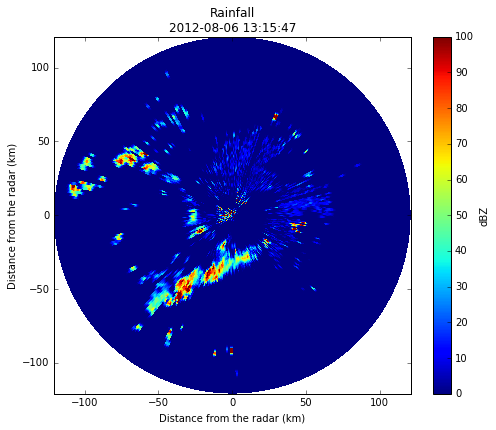

In [17]:
# reflectivity
pl.figure(figsize=(8,8))
ax,pm = wrl.vis.plot_ppi(np.ma.masked_invalid(RKDP), r=attrs_phi['r']/1000., vmin=0, vmax=100)
cb = pl.colorbar(pm, shrink=0.8)
cb.set_label('dBZ')
pl.xlim((-121,121))
pl.ylim((-121,121))
pl.xlabel('Distance from the radar (km)')
pl.ylabel('Distance from the radar (km)')
pl.title('Rainfall\n' + str(attrs_phi['time']))